In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [3]:
#a)
#Your code:
x = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

model = LinearRegression().fit(X_train, y_train)
#Hint: .fit()

> Notes:
> - i have split data into train and test sets
> - to learn the model i used `fit` function that takes as parameters array of features (multiple features are allowed) and array representing response to these features

Model score is: 0.5064584485915237; mean squared error is: 440813929568.585


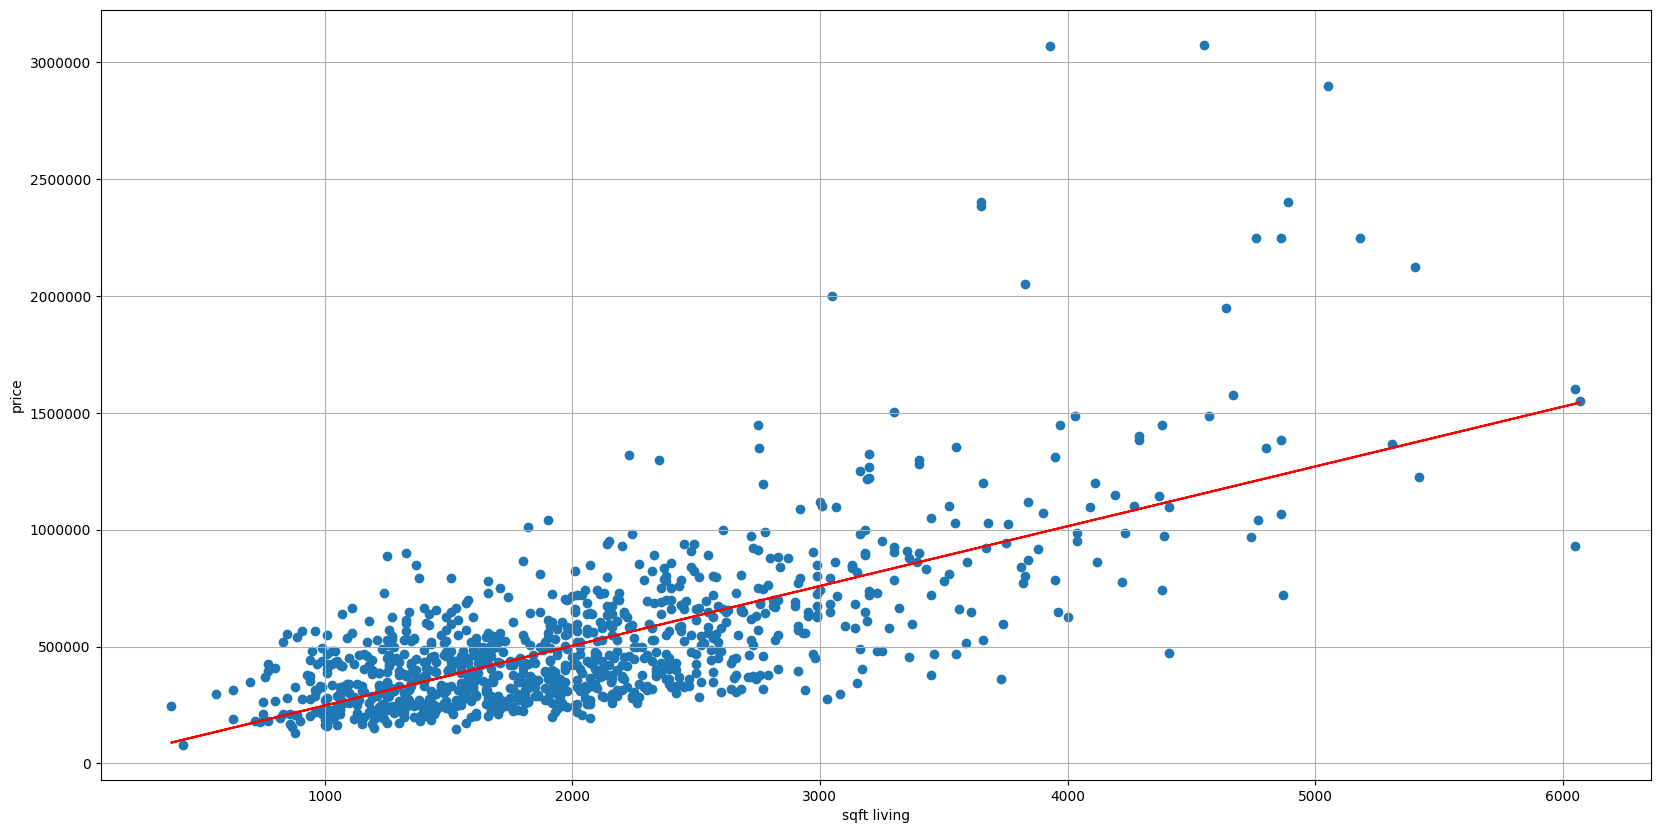

In [4]:
#b)

#Your code:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('sqft living')
ax.set_ylabel('price')
ax.ticklabel_format(style='plain')
ax.plot(x, (x*model.coef_ + model.intercept_), 'r')
ax.scatter(x,y)
ax.grid()


model_score = model.score(X_test, y_test)
mse = mean_squared_error(X_test, y_test)
print(f'Model score is: {model_score}; mean squared error is: {mse}')
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

> Notes:
> - to evaluate quality of the model i used `mean_squared_error` function which name is self-explanatory and also `score`
> - `score` function returns values between 0 and 1 (where 1 means that our model is ideal)
> - in the plot we can not observe coherent data (look at prices above 3000 on x-axis) which is caused by the fact that houses prices are not only correlated to their size. Because of that it is harder to create an efficient predicting model. Based on the sklearn library, the red line on the plot is plotted as close as possible to all points on average (see the point below)
> - `fit` method creates a model using residual sum of squares minimization 

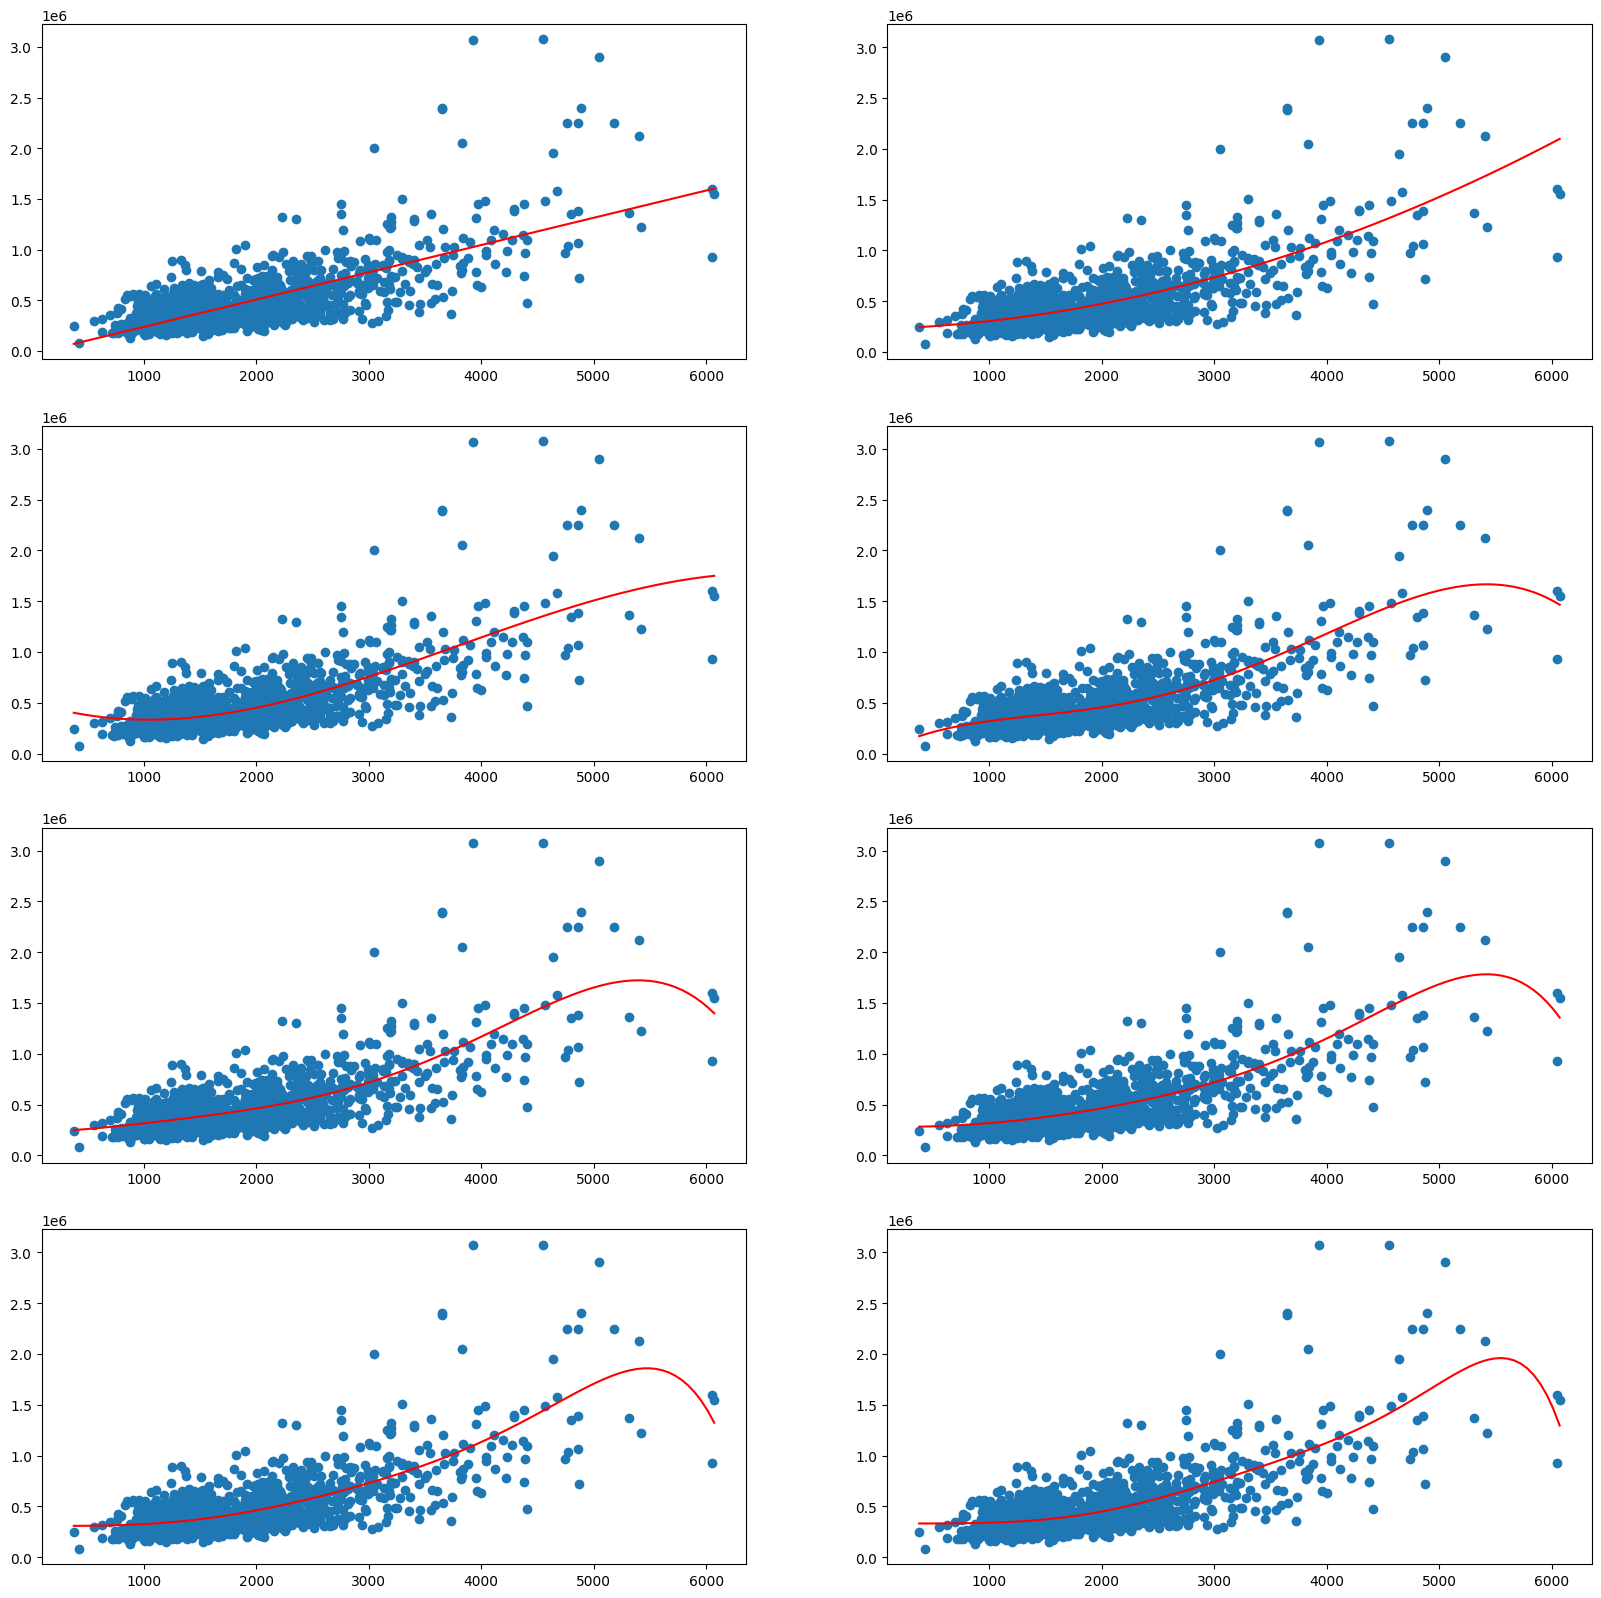

In [5]:
#c)
#Your code:
mean = []
fig, ax = plt.subplots(4, 2, figsize=(20,20))

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(x)
    model.fit(X_order, y)

    x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    X_range_order = poly.transform(x_range)

    y_predicted = model.predict(X_range_order)

    col_index = 0 if order % 2 == 1 else 1

    ax[(order - 1) // 2, col_index].scatter(x,y)
    ax[(order - 1) // 2, col_index].plot(x_range, y_predicted, 'r')

    mean.append(mean_squared_error(y, model.predict(X_order)))

> Notes: 
> - the model better fits the training dataset as the degree of the polynomial increases, this is caused by the fact that polynomial are more flexible than just a linear function
> - looking at the plots above, we can expect that the higher the degree of the polynomial, the smaller the error is

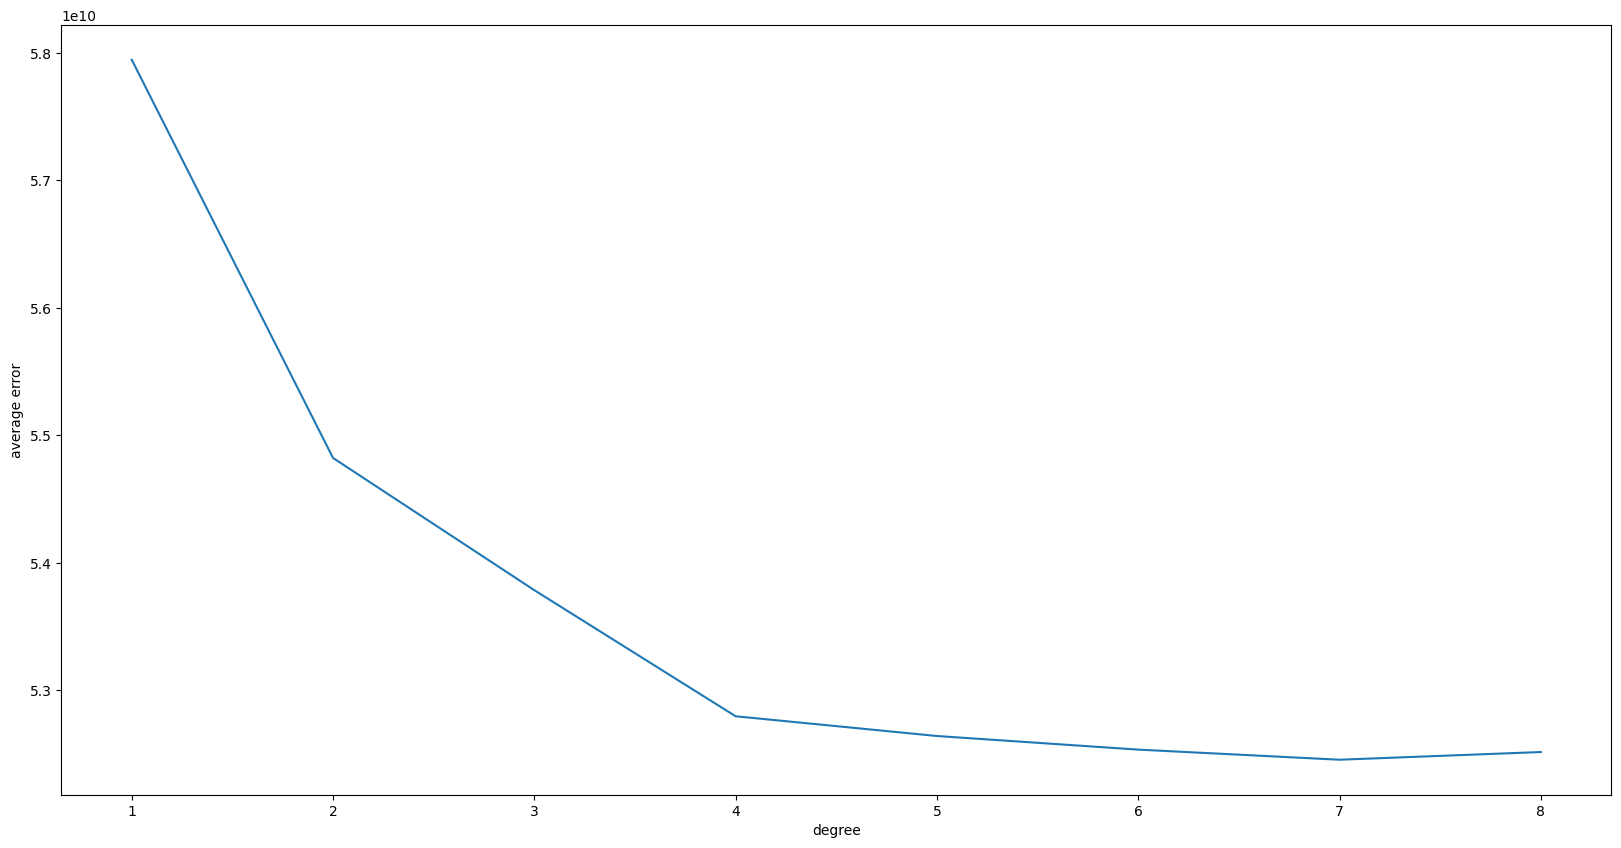

In [6]:
#Your code:
degree = list(range(1, 9))
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylabel('average error')
ax.set_xlabel('degree')
ax.plot(degree, mean)


> Notes:
> - above chart represents the average error (mean squared error), depending on the degree of the polynomial. 
> - as mentioned earlier, the higher the degree of the polynomial, the better it fits to the data. However, it has its limitations that we could observe above fourth degree where the line on the plot is almost flat (meaning that quality of the model did not change)
> - note that the model evaluation was done on the training set (on the same set that was used to train the model)

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

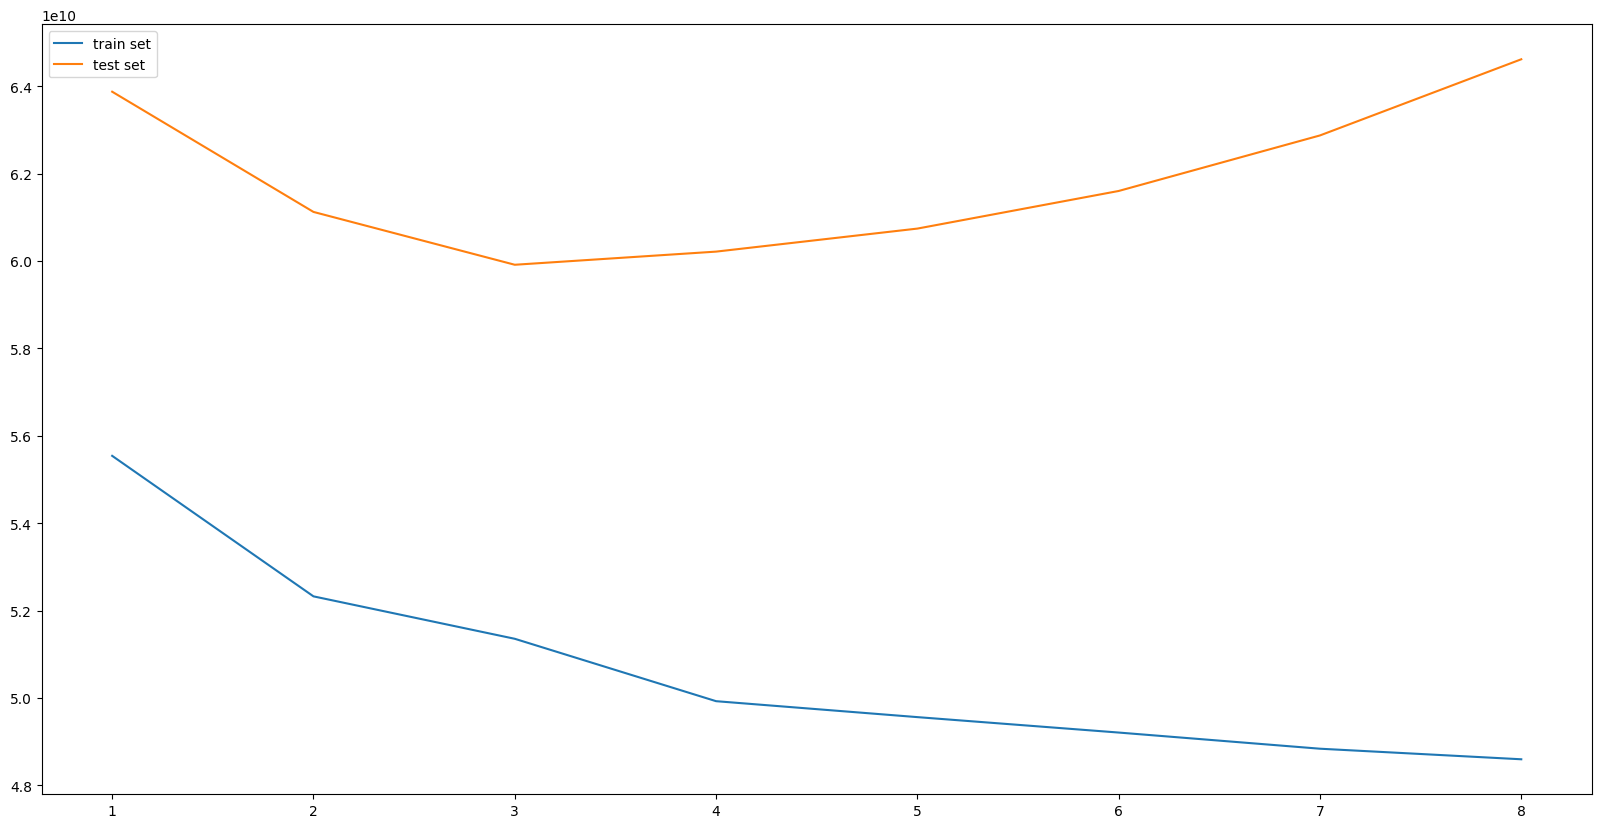

In [7]:
#a)

mean_train = []
mean_test = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(x)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model.fit(X_train, y_train)

    y_predicted = model.predict(X_train)
    mean_train.append(mean_squared_error(y_train, y_predicted))

    y_predicted = model.predict(X_test)
    mean_test.append(mean_squared_error(y_test, y_predicted))

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(degree, mean_train, label='train set')
ax.plot(degree, mean_test, label='test set')
ax.legend()



> Notes: 
> - we can see that train data has a significant advantage in accuracy compared to the test set
> - what is interesting, mean squared error above third degree increases (for the test data), even though we would expect the opposite behaviour. It is probably caused by `train_test_split` function which assigned to the test set some data that was harder to fit to any curve.
> - when we change value of `random_state` argument in `train_test_split` for example to 40, above case does not occur. `random_state` is responsible for which elements of our original dataset go to the test set and which to the training set
> - in general, as model complexity increases, training error decreases. This is caused by the fact that the model better adapts to the training set. However, low training error is not a good measure of the quality of a model unless it includes a complete dataset.
> - the model was trained on a train dataset, hence it is not used to data from the test set (which results in worse performance above third degree)

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

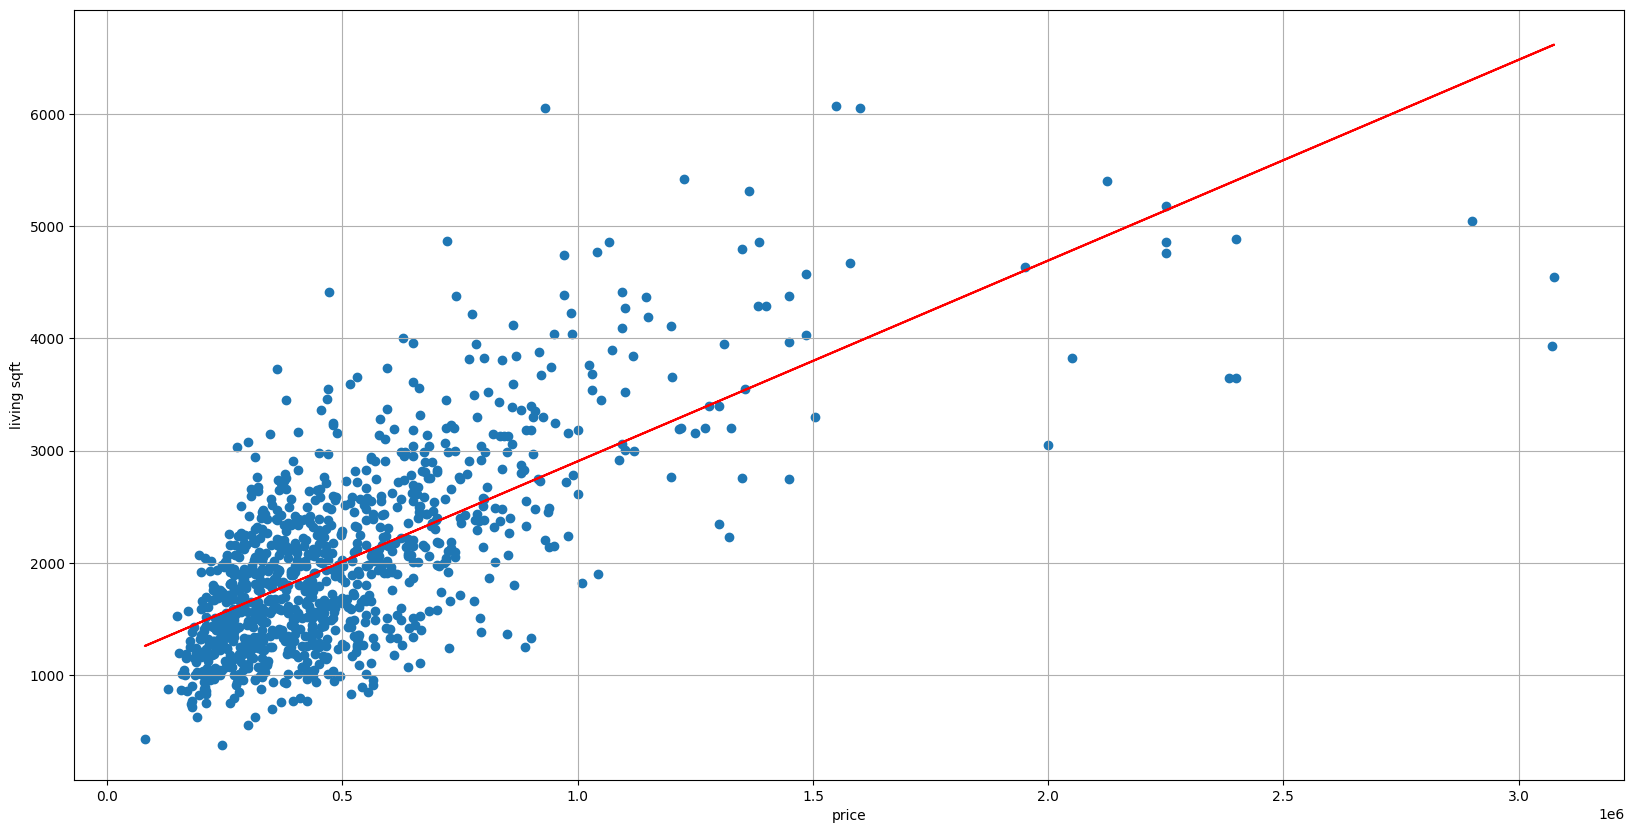

In [8]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = LinearRegression()
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('price')
ax.set_ylabel('living sqft')

ax.plot(X, (X*model.coef_ + model.intercept_), 'r')
ax.scatter(X, y)
ax.grid()

> Notes:
> - in this exercise, we swap the data axes in order to predict living space based on given price. In result we get a different regression line than 
> - it is **not** the regression line as in the exercise 1 but in other orientetion 

In [9]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:


Mean squared error equals: 48749250331.21729


In [10]:
# Model 1
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'condition']].values.reshape(-1, 5)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias=False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 39834822831.22374


> Notes: 
> - in this model i take into account one more variable which is `condition`, `test_size` was reduced to `0.1` and i changed generator seed to `40` (`random_state`). This resulted in `20%` improvement
> - we could make it even more efficient by trying out different random_sates 
> - if adding one more feature to the model resulted in a better score what would happen if we added more variables into the account?

In [11]:
# Model 2
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'condition', 'bathrooms', 'bedrooms']].values.reshape(-1, 7)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(8, include_bias=False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 442520753720.4438


> Notes:
> - adding more variables into the account changed almost nothing
> - i also tried changing the degree of the polynomial to higher values but it resulted in a lower score 